<a href="https://colab.research.google.com/github/naufalfrdss/DeepLearning/blob/main/UTS/FishImageDataset/CNN_Model_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras import layers, models
import numpy as np
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import auc, roc_auc_score, roc_curve, f1_score, recall_score, precision_score, confusion_matrix, accuracy_score
import seaborn as sns

In [4]:
base_dir = 'G:\My Drive\FishImageDataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')


In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=3.6,                 # ~0.01 rotasi
    zoom_range=0.05,
    horizontal_flip=True,
    brightness_range=[0.95, 1.05],      # ~±0.05 brightness
    shear_range=0.0,                    # opsional
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 8801 images belonging to 31 classes.
Found 2751 images belonging to 31 classes.
Found 1760 images belonging to 31 classes.


Kelas ikan: ['Bangus', 'Big Head Carp', 'Black Spotted Barb', 'Catfish', 'Climbing Perch', 'Fourfinger Threadfin', 'Freshwater Eel', 'Glass Perchlet', 'Goby', 'Gold Fish', 'Gourami', 'Grass Carp', 'Green Spotted Puffer', 'Indian Carp', 'Indo-Pacific Tarpon', 'Jaguar Gapote', 'Janitor Fish', 'Knifefish', 'Long-Snouted Pipefish', 'Mosquito Fish', 'Mudfish', 'Mullet', 'Pangasius', 'Perch', 'Scat Fish', 'Silver Barb', 'Silver Carp', 'Silver Perch', 'Snakehead', 'Tenpounder', 'Tilapia']


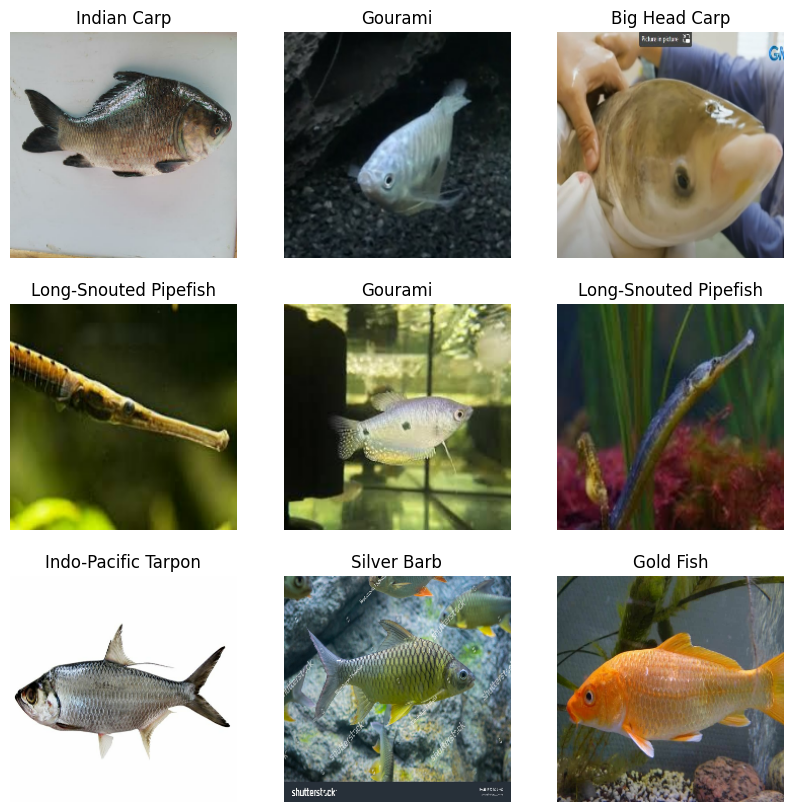

In [ ]:
class_names = train_ds.class_names
num_classes = len(class_names)
print("Kelas ikan:", class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])
        plt.axis("off")

# CNN Model

In [7]:
cnn_model = models.Sequential([
    layers.InputLayer(input_shape=(224, 224, 3)),

    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),

    # Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),

    # Classifier
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(31, activation='softmax')
])

In [8]:
cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(patience=2, factor=0.5, verbose=1)
]

history = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
276/276 [==============================] - 470s 2s/step - loss: 3.2223 - accuracy: 0.2074 - val_loss: 5.8483 - val_accuracy: 0.0752 - lr: 0.0010
Epoch 2/20
276/276 [==============================] - 464s 2s/step - loss: 2.5657 - accuracy: 0.3144 - val_loss: 3.6423 - val_accuracy: 0.2472 - lr: 0.0010
Epoch 3/20
276/276 [==============================] - 411s 1s/step - loss: 2.3749 - accuracy: 0.3455 - val_loss: 3.8347 - val_accuracy: 0.2679 - lr: 0.0010
Epoch 4/20
276/276 [==============================] - 412s 1s/step - loss: 2.1683 - accuracy: 0.3912 - val_loss: 2.3547 - val_accuracy: 0.3908 - lr: 0.0010
Epoch 5/20
276/276 [==============================] - 452s 2s/step - loss: 2.0092 - accuracy: 0.4219 - val_loss: 1.7339 - val_accuracy: 0.4878 - lr: 0.0010
Epoch 6/20
276/276 [==============================] - 438s 2s/step - loss: 1.8255 - accuracy: 0.4689 - val_loss: 1.6135 - val_accuracy: 0.5380 - lr: 0.0010
Epoch 7/20
276/276 [==============================] - 465s 2s/st

In [11]:
import numpy as np

# Melakukan prediksi dengan model
y_pred_probs = cnn_model.predict(test_generator, verbose=0)

# Mengambil kelas yang diprediksi (argmax) dari probabilitas prediksi
y_pred = np.argmax(y_pred_probs, axis=1)

y_test = test_generator.classes

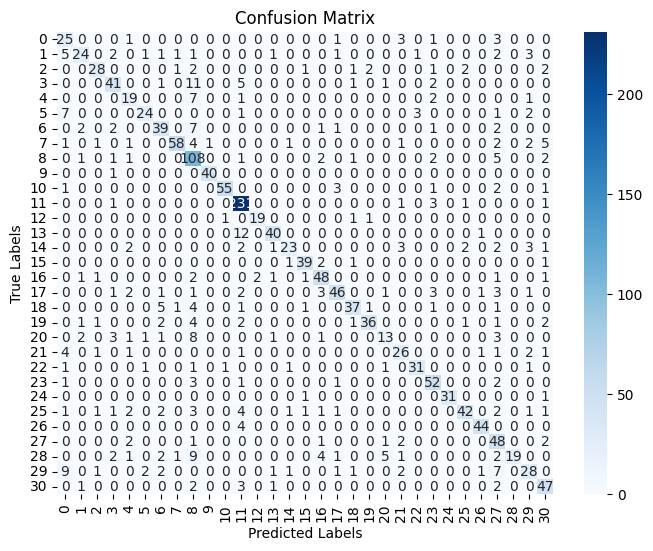


Accuracy: 0.7733
Precision: 0.7940
Recall: 0.7733
F1 Score: 0.7719
ROC AUC Score: 0.9854


In [19]:
from sklearn.metrics import auc, roc_auc_score, roc_curve, f1_score, recall_score, precision_score, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


# Menghitung metrik evaluasi
cnn_acc = accuracy_score(y_test, y_pred)
cnn_precision = precision_score(y_test, y_pred, average='weighted')
cnn_recall = recall_score(y_test, y_pred, average='weighted')
cnn_f1 = f1_score(y_test, y_pred, average='weighted')
cnn_roc_auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')

# Visualisasi dengan Seaborn (Heatmap Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan hasil metrik
print(f"\nAccuracy: {cnn_acc:.4f}")
print(f"Precision: {cnn_precision:.4f}")
print(f"Recall: {cnn_recall:.4f}")
print(f"F1 Score: {cnn_f1:.4f}")
print(f"ROC AUC Score: {cnn_roc_auc:.4f}")

Unique labels in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


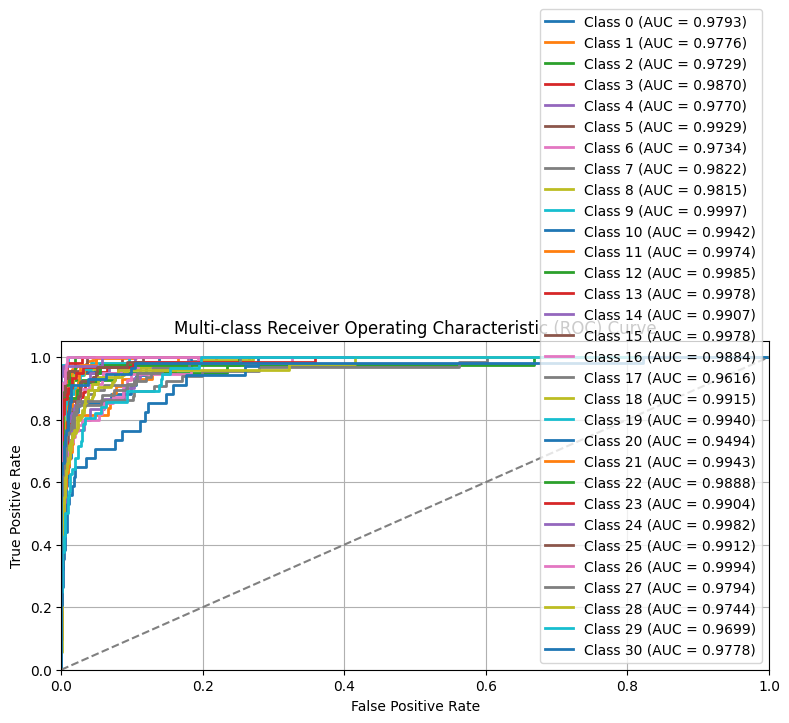

In [22]:
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Normalisasi probabilitas jika diperlukan (pastikan y_pred_probs sudah dalam bentuk probabilitas)
y_pred_probs = y_pred_probs / np.sum(y_pred_probs, axis=1, keepdims=True)

# Cek jumlah kelas
n_classes = y_pred_probs.shape[1]
print("Unique labels in y_test:", np.unique(y_test))

# Konversi y_test ke One-vs-Rest (biner)
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Warna berbeda untuk tiap kelas
colors = cycle(plt.cm.tab10.colors)

plt.figure(figsize=(8, 6))

# Plot ROC untuk tiap kelas
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)  # Menghitung AUC untuk kelas ke-i
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Class {i} (AUC = {roc_auc:.4f})')

# Menambahkan garis referensi diagonal (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labeling dan layout
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()